<H1> 서울시 평균 기온 예측 해커톤

- https://dacon.io/competitions/official/236200/data

-  회귀

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
!apt-get update -qq
!apt-get install fonts-nanum* -qq
import matplotlib.font_manager as fm
import warnings
warnings.filterwarnings(action='ignore')
path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf' # 나눔 고딕
font_name = fm.FontProperties(fname=path, size=10).get_name() # 기본 폰트 사이즈 : 10
plt.rc('font', family=font_name)

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 40 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 39 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

# 제주와 관련된 것

## 유동인구

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 파일 경로
#file_path = '/content/drive/MyDrive/skt/open/sample_submission.csv'
file_path = '/content/drive/MyDrive/skt/data_jeju.csv'

# CSV 파일을 데이터프레임으로 읽기
df = pd.read_csv(file_path, encoding='euc-kr')

# 데이터프레임 확인
df.head()

,base_year_month,sex,age_range,time_range,residence_population_count
0,201801,남성,10세 미만,1-2시,2088640.98
1,201801,남성,10세 미만,11-12시,1656660.14
2,201801,남성,10세 미만,13-14시,1539213.93
3,201801,남성,10세 미만,15-16시,1457142.69
4,201801,남성,10세 미만,17-18시,1444125.97


In [ ]:


# 'base_year_month' 나누기
df['year'] = df['base_year_month'].astype(str).str[:4]
df['month'] = df['base_year_month'].astype(str).str[4:]
df = df.drop('base_year_month', axis=1)

# 'time_range' 나누기
df[['start_time', 'end_time']] = df['time_range'].str.split('-', expand=True)
df = df.drop('time_range', axis=1)

# 'end_time'에서 '시' 제거
df['end_time'] = df['end_time'].str.replace('시', '')
df.head()

,sex,age_range,residence_population_count,year,month,start_time,end_time
0,남성,10세 미만,2088640.98,2018,01,1,2
1,남성,10세 미만,1656660.14,2018,01,11,12
2,남성,10세 미만,1539213.93,2018,01,13,14
3,남성,10세 미만,1457142.69,2018,01,15,16
4,남성,10세 미만,1444125.97,2018,01,17,18


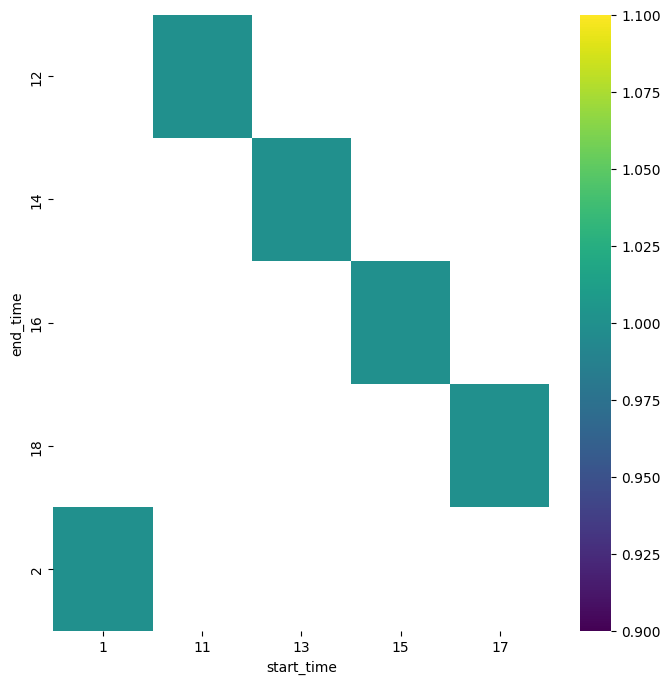

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['end_time'].value_counts()
    for x_label, grp in _df_8.groupby('start_time')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('start_time')
_ = plt.ylabel('end_time')

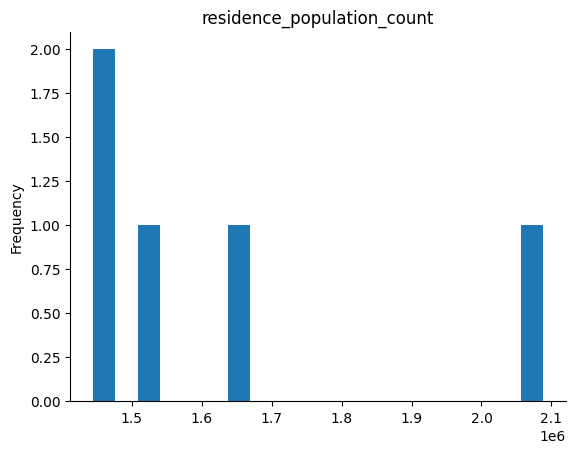

In [ ]:
from matplotlib import pyplot as plt
_df_0['residence_population_count'].plot(kind='hist', bins=20, title='residence_population_count')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# 'sex'와 'age_range' 열에 대해 Label Encoding 수행
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])
df['age_range'] = label_encoder.fit_transform(df['age_range'])
df.head()

,sex,age_range,residence_population_count,year,month,start_time,end_time
0,0,0,2088640.98,2018,01,1,2
1,0,0,1656660.14,2018,01,11,12
2,0,0,1539213.93,2018,01,13,14
3,0,0,1457142.69,2018,01,15,16
4,0,0,1444125.97,2018,01,17,18


### 다시 전처리

In [ ]:
# 파일 경로
#file_path = '/content/drive/MyDrive/skt/open/sample_submission.csv'
file_path = '/content/drive/MyDrive/skt/data_jeju.csv'

# CSV 파일을 데이터프레임으로 읽기
df = pd.read_csv(file_path, encoding='euc-kr')

# 데이터프레임 확인
df.head()

,base_year_month,sex,age_range,time_range,residence_population_count
0,201801,남성,10세 미만,1-2시,2088640.98
1,201801,남성,10세 미만,11-12시,1656660.14
2,201801,남성,10세 미만,13-14시,1539213.93
3,201801,남성,10세 미만,15-16시,1457142.69
4,201801,남성,10세 미만,17-18시,1444125.97


In [ ]:
# 'base_year_month', 'sex', 'age_range'가 같은 행들을 합치기
df_combined = df.groupby(['base_year_month', 'sex', 'age_range'], as_index=False).agg({
    'time_range': ', '.join,
    'residence_population_count': 'sum'
})

# 데이터프레임 확인
df_combined

,base_year_month,sex,age_range,time_range,residence_population_count
0,201801,남성,10세 미만,"1-2시, 11-12시, 13-14시, 15-16시, 17-18시, 19-20시, ...",21099780.24
1,201801,남성,19세 이하,"1-2시, 11-12시, 13-14시, 15-16시, 17-18시, 19-20시, ...",25075927.60
2,201801,남성,29세 이하,"1-2시, 11-12시, 13-14시, 15-16시, 17-18시, 19-20시, ...",18326509.89
3,201801,남성,39세 이하,"1-2시, 11-12시, 13-14시, 15-16시, 17-18시, 19-20시, ...",22275460.14
4,201801,남성,49세 이하,"1-2시, 11-12시, 13-14시, 15-16시, 17-18시, 19-20시, ...",33735504.41
...,...,...,...,...,...
907,202209,여성,39세 이하,"11-12시, 13-14시, 15-16시, 17-18시, 19-20시, 21-22시...",3053184.00
908,202209,여성,49세 이하,"11-12시, 13-14시, 15-16시, 17-18시, 19-20시, 21-22시...",3040611.00
909,202209,여성,59세 이하,"11-12시, 13-14시, 15-16시, 17-18시, 19-20시, 21-22시...",3042195.00
910,202209,여성,69세 이하,"11-12시, 13-14시, 15-16시, 17-18시, 19-20시, 21-22시...",3021900.00


In [ ]:
# 'time_range' 열 삭제
df_combined = df_combined.drop('time_range', axis=1)

# 데이터프레임 확인
df_combined

,base_year_month,sex,age_range,residence_population_count
0,201801,남성,10세 미만,21099780.24
1,201801,남성,19세 이하,25075927.60
2,201801,남성,29세 이하,18326509.89
3,201801,남성,39세 이하,22275460.14
4,201801,남성,49세 이하,33735504.41
...,...,...,...,...
907,202209,여성,39세 이하,3053184.00
908,202209,여성,49세 이하,3040611.00
909,202209,여성,59세 이하,3042195.00
910,202209,여성,69세 이하,3021900.00


In [ ]:
from sklearn.preprocessing import LabelEncoder

# 'base_year_month'를 'year'과 'month'로 나누기
df_combined['year'] = df_combined['base_year_month'].astype(str).str[:4]
df_combined['month'] = df_combined['base_year_month'].astype(str).str[4:]

# 'sex'와 'age_range' 라벨 인코딩
label_encoder_sex = LabelEncoder()
label_encoder_age_range = LabelEncoder()

df_combined['sex_encoded'] = label_encoder_sex.fit_transform(df_combined['sex'])
df_combined['age_range_encoded'] = label_encoder_age_range.fit_transform(df_combined['age_range'])

# 'base_year_month', 'sex', 'age_range' 열 삭제
df_combined = df_combined.drop(['base_year_month', 'sex', 'age_range'], axis=1)

# 데이터프레임 확인
df_combined


,residence_population_count,year,month,sex_encoded,age_range_encoded
0,21099780.24,2018,01,0,0
1,25075927.60,2018,01,0,1
2,18326509.89,2018,01,0,2
3,22275460.14,2018,01,0,3
4,33735504.41,2018,01,0,4
...,...,...,...,...,...
907,3053184.00,2022,09,1,3
908,3040611.00,2022,09,1,4
909,3042195.00,2022,09,1,5
910,3021900.00,2022,09,1,6


<ipython-input-99-48568b3e4b26>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df_combined.corr()


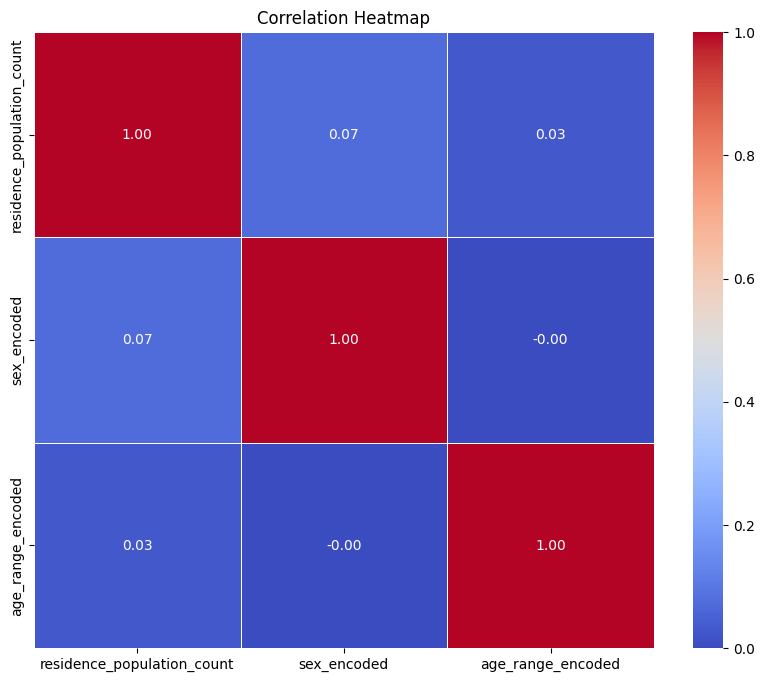

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관관계 행렬 계산
correlation_matrix = df_combined.corr()

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()


In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# 데이터 불러오기
# (여기에 주어진 데이터프레임을 사용)
# df_combined = ...

# 입력 및 출력 데이터 생성
X = df_combined[['year', 'month', 'sex_encoded', 'age_range_encoded']].values
y = df_combined['residence_population_count'].values

# 데이터 정규화
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.reshape(-1, 1)).flatten()

# 시퀀스 생성
sequence_length = 10  # 예시로 시퀀스 길이를 10으로 설정
sequences = []
targets = []

for i in range(len(X_scaled) - sequence_length):
    sequence = X_scaled[i:i+sequence_length]
    target = y_scaled[i+sequence_length]
    sequences.append(sequence)
    targets.append(target)

# Numpy 배열로 변환
sequences = np.array(sequences)
targets = np.array(targets)

# 훈련 데이터와 테스트 데이터로 분할
X_train, X_test, y_train, y_test = train_test_split(sequences, targets, test_size=0.2, random_state=42)

# RNN 모델 구축
model = Sequential()
model.add(SimpleRNN(units=50, activation='tanh', input_shape=(sequence_length, X_train.shape[2])))
model.add(Dense(units=1, activation='linear'))

model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 훈련
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# 나머지 코드는 예측 및 평가 부분을 그대로 사용


Epoch 1/50
23/23 [==============================] - 3s 19ms/step - loss: 0.8785 - val_loss: 0.5507
Epoch 2/50
23/23 [==============================] - 0s 11ms/step - loss: 0.5650 - val_loss: 0.5374
Epoch 3/50
23/23 [==============================] - 0s 10ms/step - loss: 0.5200 - val_loss: 0.5267
Epoch 4/50
23/23 [==============================] - 0s 11ms/step - loss: 0.4918 - val_loss: 0.5249
Epoch 5/50
23/23 [==============================] - 0s 10ms/step - loss: 0.4760 - val_loss: 0.5315
Epoch 6/50
23/23 [==============================] - 0s 12ms/step - loss: 0.4443 - val_loss: 0.4987
Epoch 7/50
23/23 [==============================] - 0s 11ms/step - loss: 0.4138 - val_loss: 0.4698
Epoch 8/50
23/23 [==============================] - 0s 11ms/step - loss: 0.3872 - val_loss: 0.4848
Epoch 9/50
23/23 [==============================] - 0s 11ms/step - loss: 0.3593 - val_loss: 0.4339
Epoch 10/50
23/23 [==============================] - 0s 14ms/step - loss: 0.3099 - val_loss: 0.3753
Epoch 11/

In [ ]:
# 예측
predictions_scaled = model.predict(X_test)

# 원래 스케일로 복원
predictions = scaler_y.inverse_transform(predictions_scaled).flatten()
y_test_original = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 평가 지표 계산
mse = mean_squared_error(y_test_original, predictions)

# 결과 출력
print(f'Mean Squared Error (MSE): {mse}')

6/6 [==============================] - 0s 5ms/step
Mean Squared Error (MSE): 2867196172908.056


##  감귤

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 파일 경로
#file_path = '/content/drive/MyDrive/skt/open/sample_submission.csv'
file_path1 = '/content/drive/MyDrive/skt/신고소별감귤류및만감류출하량통계(2023).csv'
file_path2 = '/content/drive/MyDrive/skt/신고소별감귤류및만감류출하량통계.csv'
# CSV 파일을 데이터프레임으로 읽기
df1 = pd.read_csv(file_path1, encoding='euc-kr')
df2 = pd.read_csv(file_path2, encoding='euc-kr')


In [ ]:
# 데이터프레임 확인
df1.head()

,출하일자,품종대분류,품종소분류,신고소,출하량
0,2022-11-25,감귤류,노지온주,제주공항,10.49
1,2022-11-25,감귤류,노지온주,제주항,916.86
2,2022-11-25,감귤류,노지온주,서귀포항,0
3,2022-11-25,감귤류,노지온주,한림항,0
4,2022-11-25,감귤류,노지온주,애월항,0


In [ ]:
# 데이터프레임 확인
df2.head()

,출하일자,품종대분류,품종소분류,신고소,출하량
0,20180101,감귤류,노지온주,제주공항,2.98
1,20180101,감귤류,노지온주,제주항,1029.07
2,20180101,감귤류,노지온주,서귀포항,1010.95
3,20180101,감귤류,노지온주,한림항,247.76
4,20180101,감귤류,노지온주,애월항,290.13


### 데이터프레임 합치기

In [ ]:
import pandas as pd

# df1 출하일자 형식 변경
df1['출하일자'] = pd.to_datetime(df1['출하일자'])

# df2 출하일자 형식 변경
df2['출하일자'] = pd.to_datetime(df2['출하일자'], format='%Y%m%d')

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 출하일자를 기준으로 정렬
merged_df = merged_df.sort_values(by='출하일자')

# 결과 확인
merged_df.head()


,출하일자,품종대분류,품종소분류,신고소,출하량
46068,2018-01-01,만감류,한라봉,제주공항,0.0
37863,2018-01-01,만감류,천혜향,한림항,0.24
37862,2018-01-01,만감류,천혜향,서귀포항,14.61
37861,2018-01-01,만감류,천혜향,제주항,6.33
37860,2018-01-01,만감류,천혜향,제주공항,0.0


In [ ]:
merged_df.shape

(74460, 5)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74460 entries, 46068 to 74459
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   출하일자    74460 non-null  datetime64[ns]
 1   품종대분류   74460 non-null  object        
 2   품종소분류   74460 non-null  object        
 3   신고소     74460 non-null  object        
 4   출하량     74460 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.4+ MB


In [ ]:
merged_df.isnull().sum()

출하일자     0
품종대분류    0
품종소분류    0
신고소      0
출하량      0
dtype: int64

In [ ]:
# 출하량 열의 콤마 제거 및 숫자로 변환
merged_df['출하량'] = merged_df['출하량'].replace(',', '', regex=True).astype(float)

# 결과 확인
merged_df.head()


,출하일자,품종대분류,품종소분류,신고소,출하량
46068,2018-01-01,만감류,한라봉,제주공항,0.00
37863,2018-01-01,만감류,천혜향,한림항,0.24
37862,2018-01-01,만감류,천혜향,서귀포항,14.61
37861,2018-01-01,만감류,천혜향,제주항,6.33
37860,2018-01-01,만감류,천혜향,제주공항,0.00


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74460 entries, 46068 to 74459
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   출하일자    74460 non-null  datetime64[ns]
 1   품종대분류   74460 non-null  object        
 2   품종소분류   74460 non-null  object        
 3   신고소     74460 non-null  object        
 4   출하량     74460 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.4+ MB


### 라벨인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# '품종대분류', '품종소분류', '신고소' 열 라벨 인코딩
merged_df['품종대분류'] = label_encoder.fit_transform(merged_df['품종대분류'])
merged_df['품종소분류'] = label_encoder.fit_transform(merged_df['품종소분류'])
merged_df['신고소'] = label_encoder.fit_transform(merged_df['신고소'])



In [ ]:
merged_df.head()

,출하일자,품종대분류,품종소분류,신고소,출하량
46068,2018-01-01,1,5,3,0.00
37863,2018-01-01,1,3,5,0.24
37862,2018-01-01,1,3,0,14.61
37861,2018-01-01,1,3,4,6.33
37860,2018-01-01,1,3,3,0.00


### 데이터 나누기 등

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [ ]:
# 출하일자 열을 인덱스로 설정
merged_df.set_index('출하일자', inplace=True)

# 데이터프레임에서 '출하량' 열만 추출
data = merged_df[['출하량']].values.astype(float)

# Min-Max Scaling을 통한 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터를 시퀀스로 변환
seq_length = 5  # 시퀀스의 길이 (조절 가능)
X, y = [], []

for i in range(len(data_scaled) - seq_length):
    X.append(data_scaled[i:i + seq_length])
    y.append(data_scaled[i + seq_length])

X, y = np.array(X), np.array(y)

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 모델 정의

In [ ]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/5
3723/3723 [==============================] - 39s 9ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 2/5
3723/3723 [==============================] - 30s 8ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 3/5
3723/3723 [==============================] - 30s 8ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 4/5
3723/3723 [==============================] - 28s 7ms/step - loss: 0.0039 - val_loss: 0.0036
Epoch 5/5
3723/3723 [==============================] - 30s 8ms/step - loss: 0.0038 - val_loss: 0.0035


466/466 [==============================] - 2s 4ms/step


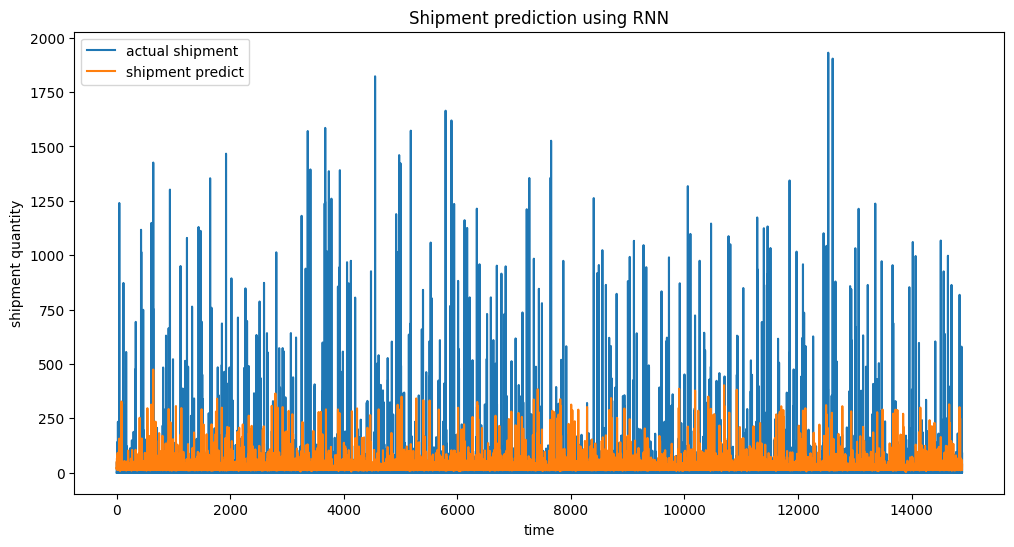

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과를 역정규화
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='actual shipment')
plt.plot(y_pred_inv, label='shipment predict')
plt.title('Shipment prediction using RNN')
plt.xlabel('time')
plt.ylabel('shipment quantity')
plt.legend()
plt.show()

### 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과를 역정규화
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# MSE 계산
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')


466/466 [==============================] - 2s 4ms/step
Mean Squared Error (MSE): 13357.316774840556


In [ ]:
'''
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 출하일자에 따른 출하량 시각화
sns.lineplot(x='출하일자', y='출하량', data=merged_df, label='전체 출하량')

# 각 항목별 출하량 시각화
sns.lineplot(x='출하일자', y='출하량', hue='신고소', data=merged_df, palette='Set2', linewidth=2)

# 그래프 제목 설정
plt.title('출하일자에 따른 출하량 및 각 항목별 출하량')

# x축 라벨 회전
plt.xticks(rotation=45)

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()
'''

"\nimport matplotlib.pyplot as plt\nimport seaborn as sns\n\n# 그래프 크기 설정\nplt.figure(figsize=(10, 6))\n\n# 출하일자에 따른 출하량 시각화\nsns.lineplot(x='출하일자', y='출하량', data=merged_df, label='전체 출하량')\n\n# 각 항목별 출하량 시각화\nsns.lineplot(x='출하일자', y='출하량', hue='신고소', data=merged_df, palette='Set2', linewidth=2)\n\n# 그래프 제목 설정\nplt.title('출하일자에 따른 출하량 및 각 항목별 출하량')\n\n# x축 라벨 회전\nplt.xticks(rotation=45)\n\n# 범례 표시\nplt.legend()\n\n# 그래프 표시\nplt.show()\n"

##  감귤 - 출하량 0인 것 제거 및 스케일링

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, f1_score, r2_score, explained_variance_score
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 파일 경로
#file_path = '/content/drive/MyDrive/skt/open/sample_submission.csv'
file_path1 = '/content/drive/MyDrive/skt/신고소별감귤류및만감류출하량통계(2023).csv'
file_path2 = '/content/drive/MyDrive/skt/신고소별감귤류및만감류출하량통계.csv'
# CSV 파일을 데이터프레임으로 읽기
df1 = pd.read_csv(file_path1, encoding='euc-kr')
df2 = pd.read_csv(file_path2, encoding='euc-kr')


In [ ]:
# 데이터프레임 확인
df1.head()

,출하일자,품종대분류,품종소분류,신고소,출하량
0,2022-11-25,감귤류,노지온주,제주공항,10.49
1,2022-11-25,감귤류,노지온주,제주항,916.86
2,2022-11-25,감귤류,노지온주,서귀포항,0
3,2022-11-25,감귤류,노지온주,한림항,0
4,2022-11-25,감귤류,노지온주,애월항,0


In [ ]:
# 데이터프레임 확인
df2.head()

,출하일자,품종대분류,품종소분류,신고소,출하량
0,20180101,감귤류,노지온주,제주공항,2.98
1,20180101,감귤류,노지온주,제주항,1029.07
2,20180101,감귤류,노지온주,서귀포항,1010.95
3,20180101,감귤류,노지온주,한림항,247.76
4,20180101,감귤류,노지온주,애월항,290.13


### 데이터프레임 합치기

In [ ]:
import pandas as pd

# df1 출하일자 형식 변경
df1['출하일자'] = pd.to_datetime(df1['출하일자'])

# df2 출하일자 형식 변경
df2['출하일자'] = pd.to_datetime(df2['출하일자'], format='%Y%m%d')

# 두 데이터프레임 합치기
merged_df = pd.concat([df1, df2], ignore_index=True)

# 출하일자를 기준으로 정렬
merged_df = merged_df.sort_values(by='출하일자')

# 결과 확인
merged_df.head()


,출하일자,품종대분류,품종소분류,신고소,출하량
46068,2018-01-01,만감류,한라봉,제주공항,0.0
37863,2018-01-01,만감류,천혜향,한림항,0.24
37862,2018-01-01,만감류,천혜향,서귀포항,14.61
37861,2018-01-01,만감류,천혜향,제주항,6.33
37860,2018-01-01,만감류,천혜향,제주공항,0.0


In [ ]:
merged_df.shape

(74460, 5)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74460 entries, 46068 to 74459
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   출하일자    74460 non-null  datetime64[ns]
 1   품종대분류   74460 non-null  object        
 2   품종소분류   74460 non-null  object        
 3   신고소     74460 non-null  object        
 4   출하량     74460 non-null  object        
dtypes: datetime64[ns](1), object(4)
memory usage: 3.4+ MB


In [ ]:
merged_df.isnull().sum()

출하일자     0
품종대분류    0
품종소분류    0
신고소      0
출하량      0
dtype: int64

In [ ]:
# 출하량 열의 콤마 제거 및 숫자로 변환
merged_df['출하량'] = merged_df['출하량'].replace(',', '', regex=True).astype(float)

# 결과 확인
merged_df.head()


,출하일자,품종대분류,품종소분류,신고소,출하량
46068,2018-01-01,만감류,한라봉,제주공항,0.00
37863,2018-01-01,만감류,천혜향,한림항,0.24
37862,2018-01-01,만감류,천혜향,서귀포항,14.61
37861,2018-01-01,만감류,천혜향,제주항,6.33
37860,2018-01-01,만감류,천혜향,제주공항,0.00


In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74460 entries, 46068 to 74459
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   출하일자    74460 non-null  datetime64[ns]
 1   품종대분류   74460 non-null  object        
 2   품종소분류   74460 non-null  object        
 3   신고소     74460 non-null  object        
 4   출하량     74460 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(3)
memory usage: 3.4+ MB


### 라벨인코딩

In [ ]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
label_encoder = LabelEncoder()

# '품종대분류', '품종소분류', '신고소' 열 라벨 인코딩
merged_df['품종대분류'] = label_encoder.fit_transform(merged_df['품종대분류'])
merged_df['품종소분류'] = label_encoder.fit_transform(merged_df['품종소분류'])
merged_df['신고소'] = label_encoder.fit_transform(merged_df['신고소'])



In [ ]:
merged_df.head()

,출하일자,품종대분류,품종소분류,신고소,출하량
46068,2018-01-01,1,5,3,0.00
37863,2018-01-01,1,3,5,0.24
37862,2018-01-01,1,3,0,14.61
37861,2018-01-01,1,3,4,6.33
37860,2018-01-01,1,3,3,0.00


In [ ]:
merged_df.shape

(74460, 5)

### 출하량 0인 행 제거

In [ ]:
# 출하량이 0인 행 제거
merged_df = merged_df[merged_df['출하량'] != 0]

# 결과 확인
merged_df.shape


(21527, 5)

### StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler

# 출하량 열을 표준화
scaler = StandardScaler()
merged_df['출하량'] = scaler.fit_transform(merged_df[['출하량']].values)



<ipython-input-79-48e2ad3d394d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_df['출하량'] = scaler.fit_transform(merged_df[['출하량']].values)


### 데이터 나누기 등

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense
import matplotlib.pyplot as plt

In [ ]:
# 출하일자 열을 인덱스로 설정
merged_df.set_index('출하일자', inplace=True)

# 데이터프레임에서 '출하량' 열만 추출
data = merged_df[['출하량']].values.astype(float)

# Min-Max Scaling을 통한 정규화
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

# 데이터를 시퀀스로 변환
seq_length = 5  # 시퀀스의 길이 (조절 가능)
X, y = [], []

for i in range(len(data_scaled) - seq_length):
    X.append(data_scaled[i:i + seq_length])
    y.append(data_scaled[i + seq_length])

X, y = np.array(X), np.array(y)

# 데이터를 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 모델 정의

In [ ]:
# RNN 모델 정의
model = Sequential()
model.add(SimpleRNN(50, activation='relu', input_shape=(seq_length, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# 모델 학습
model.fit(X_train, y_train, epochs=5, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/5
1077/1077 [==============================] - 10s 8ms/step - loss: 0.0122 - val_loss: 0.0124
Epoch 2/5
1077/1077 [==============================] - 9s 8ms/step - loss: 0.0120 - val_loss: 0.0124
Epoch 3/5
1077/1077 [==============================] - 7s 7ms/step - loss: 0.0119 - val_loss: 0.0123
Epoch 4/5
1077/1077 [==============================] - 9s 8ms/step - loss: 0.0119 - val_loss: 0.0122
Epoch 5/5
1077/1077 [==============================] - 7s 7ms/step - loss: 0.0119 - val_loss: 0.0121


135/135 [==============================] - 0s 2ms/step


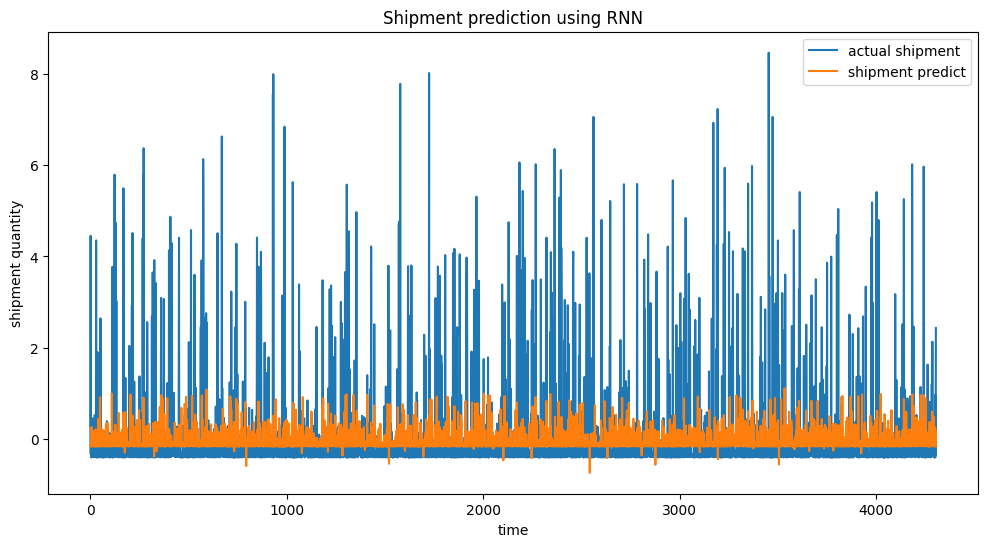

In [ ]:
# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과를 역정규화
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# 시각화
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='actual shipment')
plt.plot(y_pred_inv, label='shipment predict')
plt.title('Shipment prediction using RNN')
plt.xlabel('time')
plt.ylabel('shipment quantity')
plt.legend()
plt.show()

### 모델 평가

In [ ]:
from sklearn.metrics import mean_squared_error

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test)

# 예측 결과를 역정규화
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# MSE 계산
mse = mean_squared_error(y_test_inv, y_pred_inv)
print(f'Mean Squared Error (MSE): {mse}')


135/135 [==============================] - 0s 3ms/step
Mean Squared Error (MSE): 0.9725630963094093


## 감귤 전처리 후 모델 평가 변화
- 전처리 전:Mean Squared Error (MSE): 13357.316774840556
- 전처리 후: Mean Squared Error (MSE): 0.9725630963094093